<a href="https://colab.research.google.com/github/Kzis/ML-Programming/blob/master/Homework/HW3-Classification-Logistic%20Regression/CTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"driftkao","key":"01b343b13adcc7e4184b1af8885f1b78"}'}

In [4]:
!ls -a

.  ..  .config	kaggle.json  sample_data


In [6]:
! mkdir ~/.kaggle



mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
! cp kaggle.json ~/.kaggle/

In [8]:
!ls -a

.  ..  .config	kaggle.json  sample_data


In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle competitions download -c avazu-ctr-prediction

 99% 1.03G/1.04G [00:17<00:00, 66.5MB/s]
100% 1.04G/1.04G [00:17<00:00, 64.1MB/s]
 97% 114M/118M [00:02<00:00, 30.9MB/s]
100% 118M/118M [00:03<00:00, 41.0MB/s]
 66% 22.0M/33.2M [00:00<00:00, 27.2MB/s]
100% 33.2M/33.2M [00:00<00:00, 56.5MB/s]


In [0]:
!gunzip test.gz

In [0]:
!gunzip train.gz

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [19]:
# d = pd.read_csv('train')
df = pd.read_csv('train', nrows=5e5)
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157


In [0]:
device_type = pd.get_dummies(df.device_type, drop_first=True)
device_conn_type = pd.get_dummies(df.device_conn_type, drop_first=True)
app_category = pd.get_dummies(df.app_category, drop_first=True)


In [0]:
X = df[['banner_pos', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']]
X = pd.concat([X, device_type, device_conn_type, app_category], axis=1)

y = df['click']

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.8,
                                                    random_state=112)

In [23]:
logreg = LogisticRegression(solver='liblinear',
                            max_iter=1000,
                            verbose=100)
logreg_cv = GridSearchCV(logreg, param_grid, cv=10)
logreg_cv.fit(X_train, y_train)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=100,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty'

In [24]:
print("Best Parameter: {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

Best Parameter: {'C': 3.727593720314938, 'penalty': 'l1'}
Best Accuracy: 0.83574


In [25]:
logreg = LogisticRegression(solver='liblinear',
                            C=logreg_cv.best_params_['C'],
                            penalty= logreg_cv.best_params_['penalty'])

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91    334361
           1       0.36      0.00      0.01     65639

    accuracy                           0.84    400000
   macro avg       0.60      0.50      0.46    400000
weighted avg       0.76      0.84      0.76    400000



In [26]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.6623144791878839


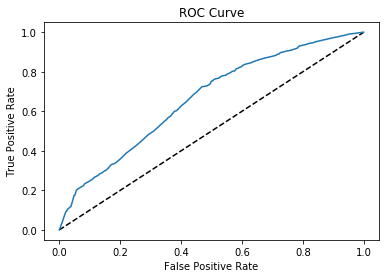

In [27]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()